# TITLE

Thinking about why leave points cut off so quickly
reporting time it took to do the task, velocity
checker for outliers-- one point super far from point before and point after

data to eliminate: 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 27 (obstacle), 32, 35, 37, 39

control: 4, 5, 15, 16, 17, 19, 20, 25, 26

confed f: 21, 23, 24, 36  confed m: 28, 29, 30, 31

box: 33, 34, 38

In [936]:
%matplotlib inline

import os
import matplotlib.pyplot as plt


# Import local code
import sys
sys.path.append(os.getcwd().replace('notebooks', 'module'))

from utils import *

## Settings

In [937]:
subj_ind = 34

## Loading data

In [938]:
# Create the path to the data (assume the Github repo, but works on any computer)
dat_path = os.getcwd().replace('notebooks', 'data')
# Note: this also works, but looks like nonsense. 
#dat_path = '/'.join(os.getcwd().split('/')[0:-1]) + '/data/'

In [939]:
# Check all data files
all_files = os.listdir(dat_path)
subj_files = [file for file in all_files if 'subj' in file]
print(subj_files)

# Create full subj data path
subj_dat_path = os.path.join(dat_path, subj_files[subj_ind])

['subj_01.json', 'subj_02.json', 'subj_03.json', 'subj_04.json', 'subj_05.json', 'subj_06.json', 'subj_08.json', 'subj_09.json', 'subj_10.json', 'subj_11.json', 'subj_12.json', 'subj_13.json', 'subj_14.json', 'subj_15.json', 'subj_16.json', 'subj_17.json', 'subj_18.json', 'subj_19.json', 'subj_20.json', 'subj_21.json', 'subj_22.json', 'subj_23.json', 'subj_24.json', 'subj_25.json', 'subj_26.json', 'subj_27.json', 'subj_28.json', 'subj_29.json', 'subj_30.json', 'subj_31.json', 'subj_32.json', 'subj_33.json', 'subj_34.json', 'subj_35.json', 'subj_36.json', 'subj_37.json']


In [940]:
# Load the data
df = load_posyx_file(subj_dat_path)
print(subj_dat_path)

C:\Users\CCL\Documents\GitHub\Pozyx\data\subj_36.json


In [941]:
df.head()

,tagId,timestamp,x,y,z,latency
0,26457,2019-06-01 20:45:19.730999947,7735.0,7796.0,0.0,71.8
1,26382,2019-06-01 20:45:19.809999943,NaN,NaN,NaN,NaN
2,26457,2019-06-01 20:45:20.145999908,7799.0,7825.0,0.0,71.8
3,26382,2019-06-01 20:45:20.289000034,NaN,NaN,NaN,NaN
4,26457,2019-06-01 20:45:20.615000010,7806.0,7634.0,0.0,84.6


In [942]:
#Create dataframes my own way for easier access right now
dfParticipant = df[df['tagId']== 26382]
dfLocal = df[df['tagId']== 26475]
#dfConfed = df[df['tagId'] == 26395]

In [943]:
dfParticipant = dfParticipant.dropna()
#dfParticipant
#dfConfed
#dfConfed.dropna()
dfParticipant

,tagId,timestamp,x,y,z,latency
739,26382,2019-06-01 20:48:07.058000088,2358.0,6971.0,0.0,79.8
741,26382,2019-06-01 20:48:07.223000050,2517.0,6996.0,0.0,80.3
745,26382,2019-06-01 20:48:07.793999910,3088.0,7090.0,0.0,78.8
747,26382,2019-06-01 20:48:07.990999937,3209.0,6958.0,0.0,78.0
749,26382,2019-06-01 20:48:08.154000044,3290.0,7028.0,0.0,77.8
751,26382,2019-06-01 20:48:08.351999998,3375.0,6966.0,0.0,92.7
753,26382,2019-06-01 20:48:08.562999964,4000.0,6776.0,0.0,79.8
755,26382,2019-06-01 20:48:08.727999926,4275.0,6556.0,0.0,78.8
757,26382,2019-06-01 20:48:08.891999960,4631.0,6250.0,0.0,78.8
759,26382,2019-06-01 20:48:09.091000080,4933.0,6201.0,0.0,80.8


In [944]:
#Create a function to make dataframes for the participant's leaving and returning from the hallway

def createExperimentDfs(participant_df):
    leave_df = pd.DataFrame(columns=['tagId', 'timestamp', 'x', 'y', 'z', 'latency'])
    return_df = pd.DataFrame(columns=['tagId', 'timestamp', 'x', 'y', 'z', 'latency'])
    index1 = participant_df.index[0]
    index2 = 0
    marker = 0
    df_to_append = 0
    for index, row in participant_df.iterrows():
        index2 = participant_df.index[marker]
        
        if (index2 - index1 <= 2 and df_to_append == 0):
            leave_df = leave_df.append(row)
            
        elif (index2 - index1 <= 2 and df_to_append == 1):
            return_df = return_df.append(row)
            
        elif (index2 - index1 > 300):
            df_to_append = 1
        
        else:
            if (df_to_append == 0):
                leave_df = leave_df.append(row)
                #leave_df.set_value[index, 'consecutive', 'False']
            else :
                return_df = return_df.append(row)
                #return_df.set_value[index, 'consecutive', 'False']
                
        index1 = participant_df.index[marker]
        marker = marker + 1
    return leave_df, return_df

In [945]:
participant_leave, participant_return = createExperimentDfs(dfParticipant)

In [946]:
#participant_leave

In [947]:
participant_return

,tagId,timestamp,x,y,z,latency
2321,26382,2019-06-01 20:53:57.211999893,17388.0,-10892.0,0.0,79.8
2323,26382,2019-06-01 20:53:57.437000036,16548.0,-11218.0,0.0,81.8
2325,26382,2019-06-01 20:53:57.637000084,16340.0,-10961.0,0.0,86.8
2327,26382,2019-06-01 20:53:57.815000057,16505.0,-10440.0,0.0,99.0
2329,26382,2019-06-01 20:53:58.026999950,15247.0,-11133.0,0.0,83.8
2331,26382,2019-06-01 20:53:58.197000027,-10151.0,-7972.0,0.0,82.7
2333,26382,2019-06-01 20:53:58.365000010,15911.0,-10240.0,0.0,81.8
2337,26382,2019-06-01 20:53:59.036999941,15106.0,-9630.0,0.0,81.0
2339,26382,2019-06-01 20:53:59.210000038,14719.0,-9668.0,0.0,79.7
2341,26382,2019-06-01 20:53:59.374000072,14290.0,-9530.0,0.0,79.8


In [948]:
def findOutliers(parDf):
 
    index1 = parDf.index[0]
    index2 = 0
    marker = 0
    
    df_to_append = 0
    for index, row in parDf.iterrows():
        index2 = parDf.index[marker]
        if (marker >= 1):
            xDiff = abs(parDf.iloc[marker]['x'] - parDf.iloc[marker - 1]['x'])
            yDiff = abs(parDf.iloc[marker]['y'] - parDf.iloc[marker - 1]['y'])
            if (xDiff + yDiff > 7000):
                print('Possible outlier at ' + str(index - 1))
       
                
        index1 = parDf.index[marker]
        marker = marker + 1

In [949]:
findOutliers(participant_return)

#participant_return.iloc[0]['x']

Possible outlier at 2330
Possible outlier at 2332


In [950]:
print(distance(5300, 5592, 3950, 5250))

1392.6464016396983


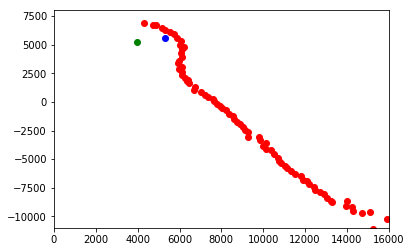

In [951]:
plt.figure()
plt.plot(participant_return.x, participant_return.y, '.', color='red', ms=12)
plt.plot(dfConfed.x, dfConfed.y, '.', color='red')
plt.plot(5300, 5592, 'b.', ms = 12)
plt.plot(3950, 5250, 'g.', ms = 12)
plt.xlim([0,16000])
plt.ylim([-11000,8000]);
plt.savefig('FileName.png')

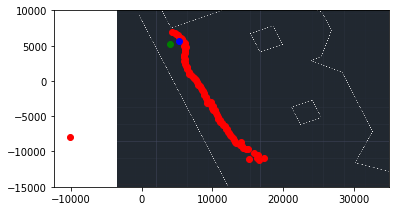

In [952]:
img = plt.imread("courtyard3.png")
fig, ax = plt.subplots()
#ax.imshow(img)
ax.imshow(img, extent=[-3500, 35000, -15000, 10000])
plt.plot(participant_return.x, participant_return.y, '.', color='red', ms=12)
plt.plot(5300, 5592, 'b.', ms = 12)
plt.plot(3950, 5250, 'g.', ms = 12)
#plt.xlim([0,20000])
#plt.ylim([-11000,8000]);